# Camada Linear

In [1]:
import torch
from torch import nn

In [2]:
torch.manual_seed(42)

perceptron = nn.Linear(in_features=3,out_features=1)

O perceptron é a unidade básica de uma rede neural artificial. Ele é composto por um conjunto de pesos e um bias. A saída do perceptron é dada pela função de ativação, que é uma função não linear. A função de ativação mais comum é a função sigmóide, mas existem outras funções de ativação, como a tangente hiperbólica, a função ReLU e a função softmax.

In [3]:
for nome,tensor in perceptron.named_parameters():
    print(nome,tensor.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])


In [4]:
(w1,w2,w3) = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()[0]

#w1 * x1 + w2 * x2 + w3 * x3 + b = 0

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(perceptron):

    (w1,w2,w3) = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()[0]

    a,b,c,d = 1,2,3,4

    x1 = np.linspace(-1,1,10)
    x2 = np.linspace(-1,1,10)

    x1,x2 = np.meshgrid(x1,x2)
    x3 =(b - w1 *x1 - w2 * x2)/w3

    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=180)

    ax.plot_surface(x1,x2,x3,cmap='plasma')

C:\Users\l04620\AppData\Local\Temp\ipykernel_18880\3283214445.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


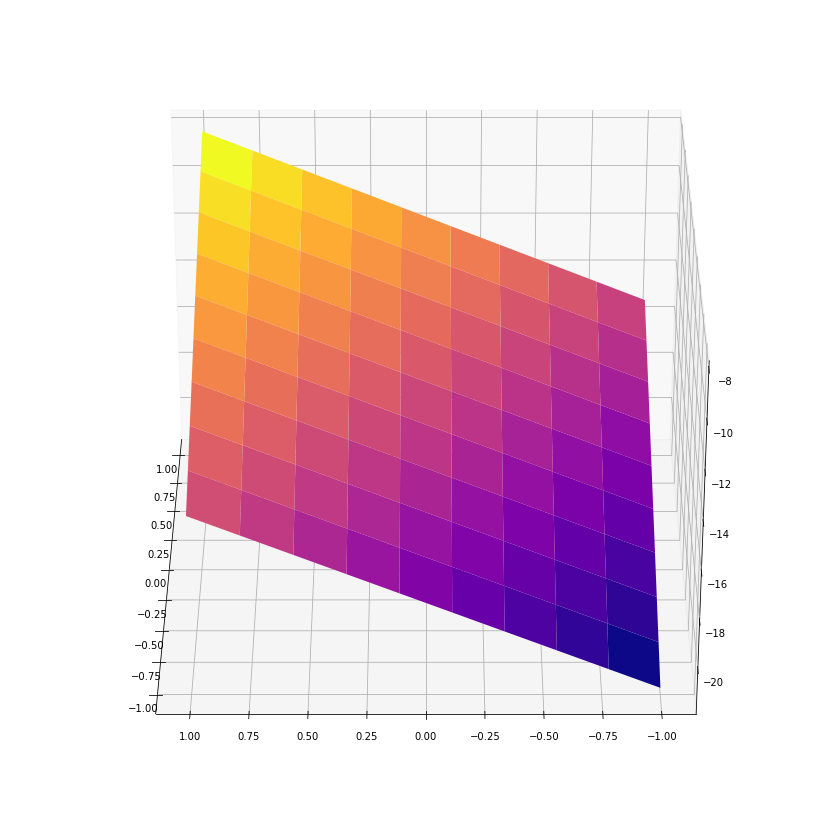

In [6]:
plot_3d(perceptron)

# Forward

- o fluxo de informação de entrada através da rede é chamado de forward pass, ja que a informação é passada para a frente. Vamos entao realizar o forward pass para a nossa rede neural de um unico perceptron. Para isso, basta realizar uma chamada de função com a variável onde instanciamos a camada liner

C:\Users\l04620\AppData\Local\Temp\ipykernel_18880\3283214445.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


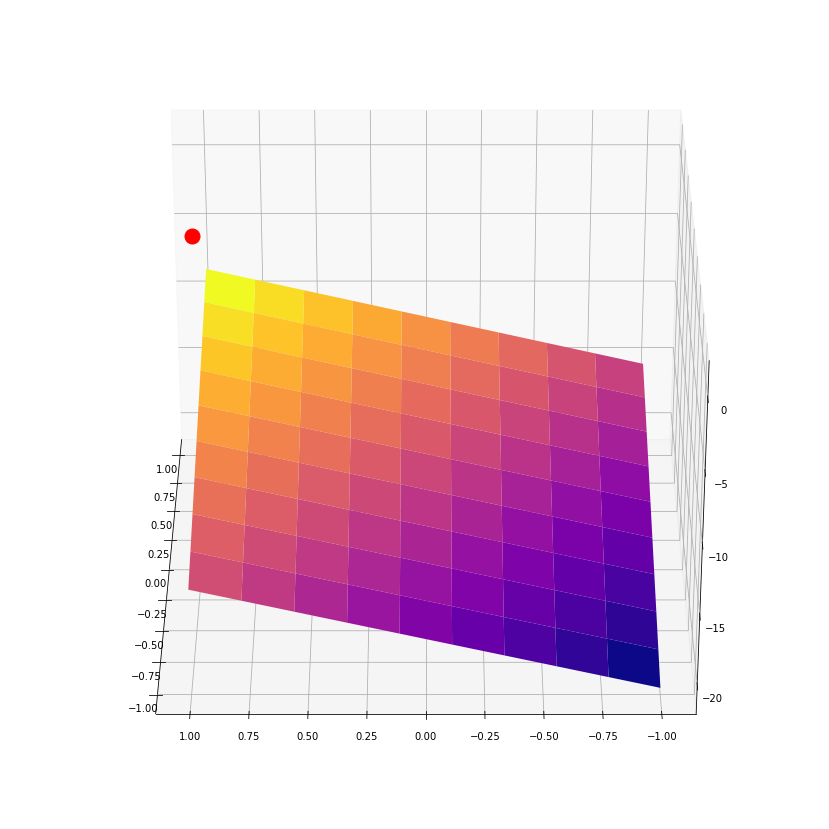

In [7]:
entradas_X = torch.Tensor([0,1, 2])

y = perceptron(entradas_X)
plot_3d(perceptron=perceptron)
plt.plot([entradas_X[0]],[entradas_X[1]], [entradas_X[2]],marker='o', markersize=15, color='r')

# Funções de ativação

- De forma abstrtata, um neuronio interpreta as suas entradas e libera uma ativação com determinada força

- Em termos práticos, um neurônio deve ativar quando suas entradas apresentam o padrão para o qual ele foi treinado

- O papel da função de ativação é definir se o neuronio deve ser ativado ou nao e qual a sua força de ativação

- Essa decisao é uma função limiar. Uma transformação nao linear que limita a saida do perceptron a um valor de 0 ou 1

- Para que o neuronio possa ativar com diferentes "forças", existem funções como a sigmoide. Ela também define um intervalo [0,1],mas pode assumir qualquer valor dentro desse intervalo

- A função limiar nao é muito utilizada em redes neurais profundas, pois ela nao permite que o gradiente seja calculado

### Função ReLU

- A função relu é uma função de ativação não linear que é definida como:

$$f(x) = max(0,x)$$

- A função relu é uma função linear para valores positivos e nula para valores negativos

### Função sigmoide

- A função sigmoide é uma função de ativação não linear que é definida como:

$$f(x) = \frac{1}{1+e^{-x}}$$

- A função sigmoide é uma função que assume valores entre 0 e 1, o que torna sua ativação mais suave
- Funções como a sigmoide permitem que voec saiba a "certeza" do neuronio em relação a sua ativação (por exemplo, se o neuronio tem 80% de certeza de que a entrada é 1, ele ativa)

### Funções de ativação mais populares

- Função sigmoide
- Função tangente hiperbólica
- Função ReLU
- Função softmax



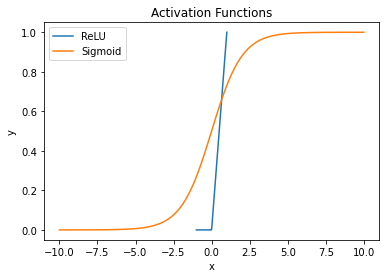

In [11]:
x = torch.linspace(-1,1,100)
y = torch.relu(x)
plt.plot(x,y)

x = torch.linspace(-10,10,100)
y = torch.sigmoid(x)
plt.plot(x,y)

plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('y') 
plt.legend(['ReLU','Sigmoid'])

documentação: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

# Camadas de ativação no Pytorch

In [12]:
from torch import nn

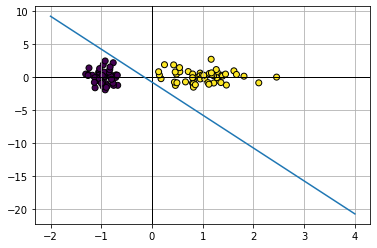

In [15]:
from sklearn.datasets import make_classification
import numpy as np

np.random.seed(42)

X1,y1 = make_classification(n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1)

def plot_model(w1,w2,b):
    x = np.linspace(-2,4,50)

    y = (-w1*x - b)/w2

    plt.axvline(0,-1,1, color='k', linewidth =1)
    plt.axhline(0,-2,4, color='k', linewidth =1)
    
    plt.plot(x,y)
    plt.grid(True)
    plt.scatter(X1[:,0],X1[:,1], marker='o', c=y1, edgecolors='k')



w1 = 20
w2 = 4
b= 3 # onde a reta cruza o eixo x
plot_model(w1,w2,b)

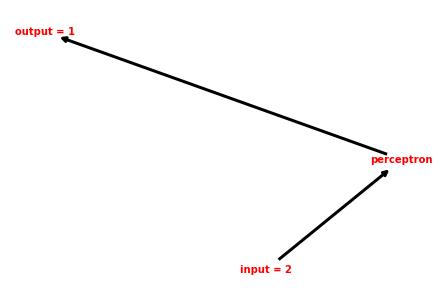

In [30]:
perceptron = nn.Linear(2,1)

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_node('input = 2')
G.add_node('perceptron')
G.add_node('output = 1')

G.add_edge('input = 2','perceptron')
G.add_edge('perceptron','output = 1')


nx.draw(G, with_labels=True, node_color='w', node_size=1000, font_size=10, font_color='r', font_weight='bold', width=3, edge_color='k')

# Criando nosso perceptron

In [35]:
perceptron = nn.Linear(2,1)
activation_sigmoid = nn.Sigmoid() # nossa função de ativação será a função Sigmoide

# Nosso perceptron inicializa com pesos aleatorios
# Vamos substituir os pesos pelos pessos que ajustaram o nosso modelo linear previamente criado

w1 = 20
w2 = 4
b= 3 

perceptron.weight = nn.Parameter(torch.Tensor([[w1,w2]])) # DEFININDO PESOS
perceptron.bias = nn.Parameter(torch.Tensor([b])) # DEFININDO VIES

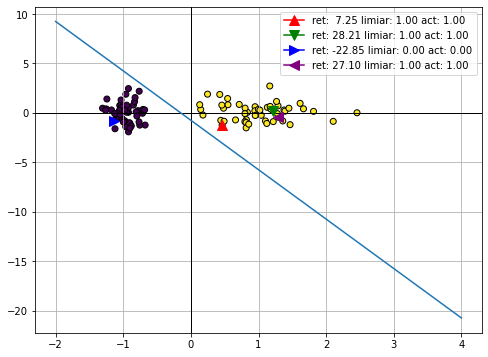

In [57]:
markers = ['^','v','>','<']
colors = ['r','g','b','purple']

plt.figure(figsize=(8,6))
plot_model(w1,w2,b)
for k, idx in enumerate([21,32,-11,4]):
    x = torch.Tensor(X1[idx])

    ret = perceptron(x)
    act = activation_sigmoid(ret)

    act_limiar = 0 if ret.data < 0 else 1

    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:4.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0],x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()


A funçaõ limiar retorna 0 ou 1 sempre e nao importa para ela o quao perto este ponto esteja no limite. A função sigmoide, por outro lado, retorna um valor entre 0 e 1, o que permite que o gradiente seja calculado. A função sigmoide é uma função não linear, o que significa que ela não é uma função linear. A função sigmoide é uma função que assume valores entre 0 e 1, o que torna sua ativação mais suave. Funções como a sigmoide permitem que voec saiba a "certeza" do neuronio em relação a sua ativação (por exemplo, se o neuronio tem 80% de certeza de que a entrada é 1, ele ativa)

Caso o ponto estaja proximo da zona de confiança, a função sigmoide retornara um valor proximo de 0.5, o que significa que o neuronio nao tem certeza de sua ativação. Entao essa seria uma vantagem da função sigmoide em relação a função limiar em determinadas situações